In [1]:
import numpy as np
import glob 
import matplotlib.pyplot as plt
import pandas as pd 
import plotly.express as px
import plotly.io as pio
import IPython

In [2]:

def auto_set_plotly_renderer():
    try:
        shell = IPython.get_ipython().__class__.__name__
        if "ZMQInteractiveShell" in shell:
            # Likely Jupyter Notebook or JupyterLab
            pio.renderers.default = "notebook_connected"
        else:
            # Fallback for scripts or non-notebook shells
            pio.renderers.default = "browser"
    except Exception:
        pio.renderers.default = "browser"  # absolute fallback

auto_set_plotly_renderer()


/tmp/ipykernel_19830/1830342118.py:7: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead

/tmp/ipykernel_19830/1830342118.py:7: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead

/tmp/ipykernel_19830/1830342118.py:7: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead

/tmp/ipykernel_19830/1830342118.py:7: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead

/tmp/ipykernel_19830/1830342118.py:7: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead

/tmp/ipykernel_19830/1830342118.py:7: FutureWarning:

The 'delim_whitespace' keyword in pd

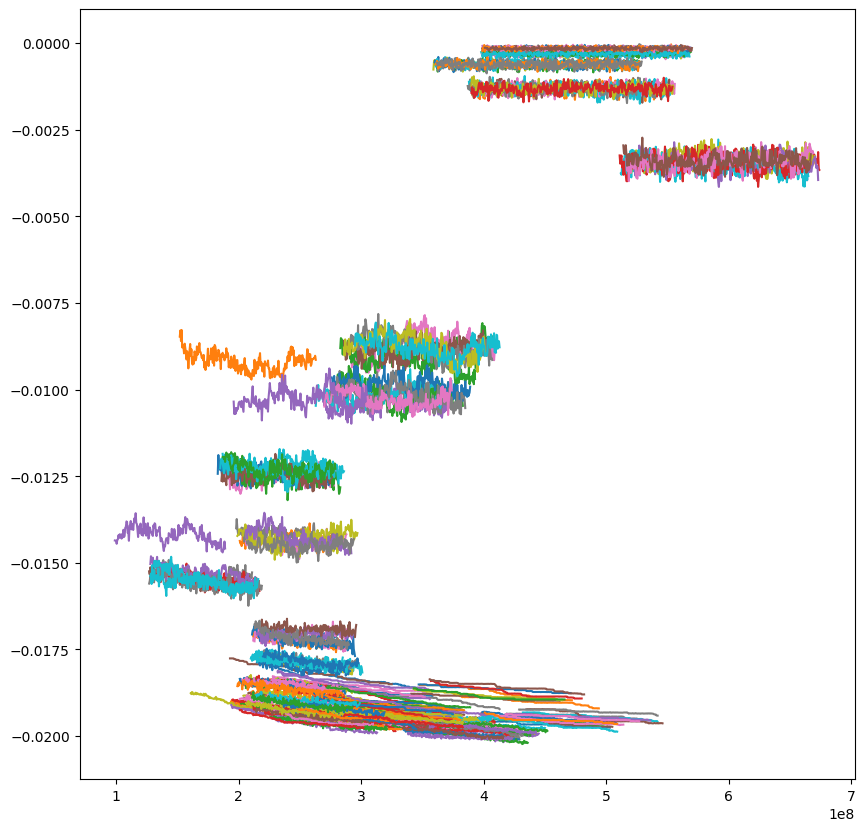

In [3]:
parent_dir = "/media/carina/vsc3_backup_big/vsc4-backup/mag2patch/mag2patch"
files = glob.glob("{}/mag2p_shift_0_*/poteng.dat".format(parent_dir))

fig,ax = plt.subplots(figsize=(10,10))

for ifile in files: 
    arr = pd.read_csv(ifile,delim_whitespace=True, skiprows=1).values
    Lambda = ifile.split("_")[2]
    Shift = ifile.split("_")[4]
    plt.plot(arr[:,0],arr[:,1])

plt.show()



In [21]:
import glob
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

pio.renderers.default = "browser"

parent_dir = "/media/carina/vsc3_backup_big/vsc4-backup/mag2patch/mag2patch"
files = glob.glob(f"{parent_dir}/mag2p_shift_0.55_lambda_2*/poteng.dat")
print(files)
# Extract lambdas
file_data = []
for ifile in files:
    arr = pd.read_csv(ifile, delim_whitespace=True, skiprows=1).values
    time = arr[:, 0] - arr[0, 0]  # shift to start from 0
    energy = arr[:, 1]
    lambda_value = float(ifile.split("_")[6])  # extract λ from filename
    file_data.append({
        "time": time,
        "energy": energy,
        "lambda": lambda_value,
        "label": os.path.basename(os.path.dirname(ifile))
    })

# Normalize lambda values to map to color
lambdas = [d["lambda"] for d in file_data]
min_lambda, max_lambda = min(lambdas), max(lambdas)
norm = lambda x: (x - min_lambda) / (max_lambda - min_lambda)

colors = px.colors.sequential.Viridis
colors = px.colors.qualitative.Dark24

fig = go.Figure()
for d in file_data:
    color_idx = int(norm(d["lambda"]) * (len(colors) - 1))
    fig.add_trace(go.Scatter(
        x=d["time"],
        y=d["energy"],
        mode='lines',
        line=dict(color=colors[color_idx]),
        name=f"λ={d['lambda']:.2f}",
        hovertemplate=f"{d['label']}<br>λ={d['lambda']}<br>time=%{{x}}<br>energy=%{{y}}<extra></extra>"
    ))

fig.update_layout(
    title="Potential Energy over Time (colored by λ)",
    xaxis_title="Time (shifted to 0)",
    yaxis_title="Energy",
    width=900,
    height=700,
    template="plotly_white",
    showlegend=False
)

fig.write_html("energy_shift.html", auto_open=True)
fig.show()

['/media/carina/vsc3_backup_big/vsc4-backup/mag2patch/mag2patch/mag2p_shift_0.55_lambda_2.5_phi2d_0.0106_rid_4/poteng.dat', '/media/carina/vsc3_backup_big/vsc4-backup/mag2patch/mag2patch/mag2p_shift_0.55_lambda_2.1_phi2d_0.0106_rid_8/poteng.dat', '/media/carina/vsc3_backup_big/vsc4-backup/mag2patch/mag2patch/mag2p_shift_0.55_lambda_25_phi2d_0.0106_rid_1/poteng.dat', '/media/carina/vsc3_backup_big/vsc4-backup/mag2patch/mag2patch/mag2p_shift_0.55_lambda_25_phi2d_0.0106_rid_3/poteng.dat', '/media/carina/vsc3_backup_big/vsc4-backup/mag2patch/mag2patch/mag2p_shift_0.55_lambda_2.3_phi2d_0.0106_rid_6/poteng.dat', '/media/carina/vsc3_backup_big/vsc4-backup/mag2patch/mag2patch/mag2p_shift_0.55_lambda_2.5_phi2d_0.0106_rid_7/poteng.dat', '/media/carina/vsc3_backup_big/vsc4-backup/mag2patch/mag2patch/mag2p_shift_0.55_lambda_2.1_phi2d_0.0106_rid_1/poteng.dat', '/media/carina/vsc3_backup_big/vsc4-backup/mag2patch/mag2patch/mag2p_shift_0.55_lambda_2.3_phi2d_0.0106_rid_1/poteng.dat', '/media/carina/vs

/tmp/ipykernel_19830/1660364725.py:15: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead

/tmp/ipykernel_19830/1660364725.py:15: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead

/tmp/ipykernel_19830/1660364725.py:15: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead

/tmp/ipykernel_19830/1660364725.py:15: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead

/tmp/ipykernel_19830/1660364725.py:15: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead

/tmp/ipykernel_19830/1660364725.py:15: FutureWarning:

The 'delim_whitespace' keyword